In [2]:
# 🛒 Análisis Exploratorio de Ventas - Superstore Dataset
# Autor: Gonzalo Otero
# Fecha: noviembre 2025

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

print("✅ Librerías importadas correctamente")


✅ Librerías importadas correctamente


In [3]:
# Cargar dataset Superstore
df = pd.read_csv("data/Sample - Superstore.csv", encoding="latin1")

# Mostrar las primeras filas
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Información general del dataset
df.info()

# Estadísticas numéricas básicas
df.describe()

# Verificar valores nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
# Eliminar filas con datos faltantes (si existieran)
df = df.dropna()

# Estandarizar nombres de columnas
df.columns = df.columns.str.replace(" ", "_").str.lower()

df.head(3)


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


Ventas por categoría:
category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: sales, dtype: float64


C:\Users\gonza\AppData\Local\Temp\ipykernel_15524\438904510.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_categoria.values, y=ventas_categoria.index, palette="Blues_d")


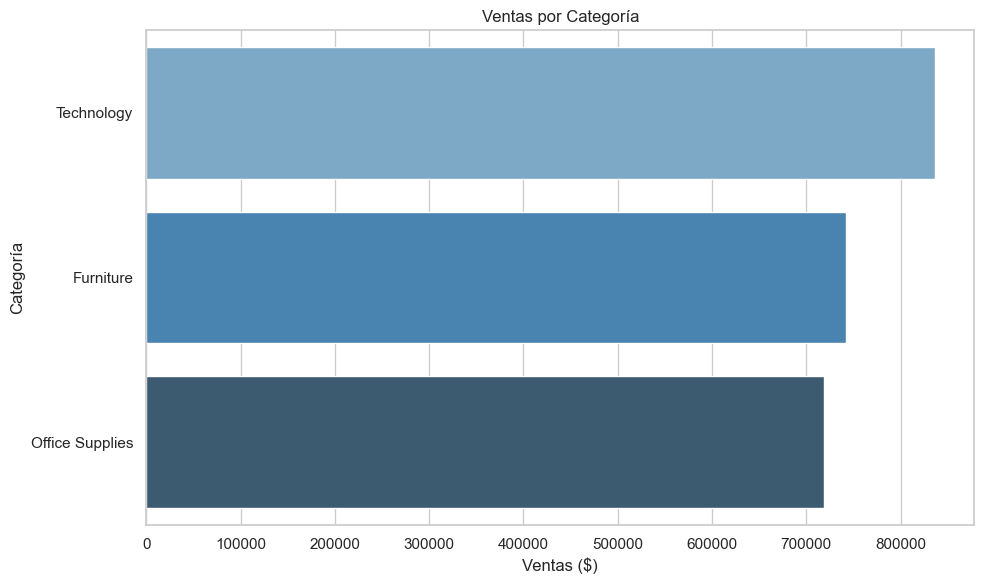

In [6]:
# Total de ventas por categoría
ventas_categoria = df.groupby("category")["sales"].sum().sort_values(ascending=False)

print("Ventas por categoría:")
print(ventas_categoria)

# Gráfico
sns.barplot(x=ventas_categoria.values, y=ventas_categoria.index, palette="Blues_d")
plt.title("Ventas por Categoría")
plt.xlabel("Ventas ($)")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()


Ventas por región:
region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: sales, dtype: float64


C:\Users\gonza\AppData\Local\Temp\ipykernel_15524\3324807013.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_region.values, y=ventas_region.index, palette="Greens_d")


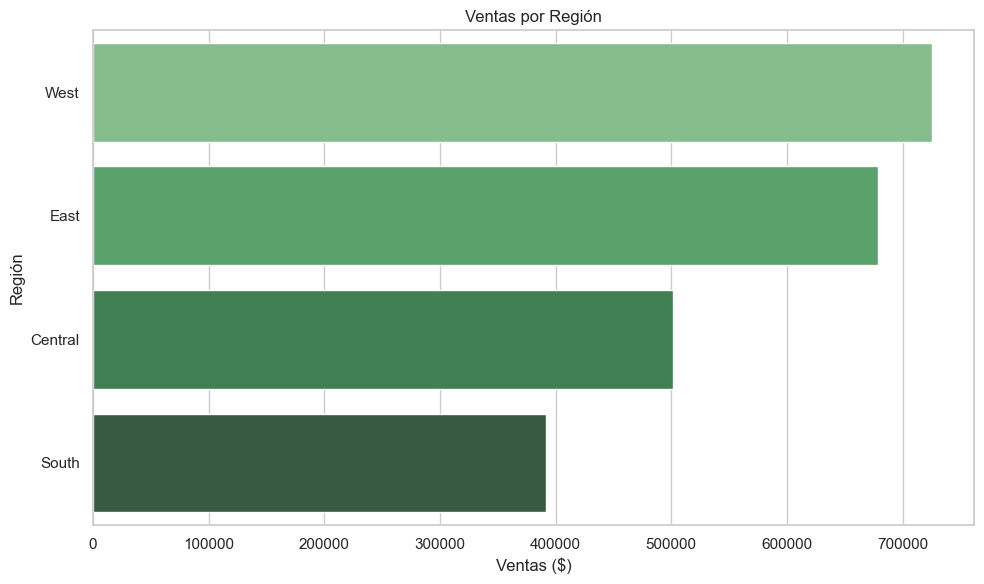

In [7]:
ventas_region = df.groupby("region")["sales"].sum().sort_values(ascending=False)

print("Ventas por región:")
print(ventas_region)

sns.barplot(x=ventas_region.values, y=ventas_region.index, palette="Greens_d")
plt.title("Ventas por Región")
plt.xlabel("Ventas ($)")
plt.ylabel("Región")
plt.tight_layout()
plt.show()


C:\Users\gonza\AppData\Local\Temp\ipykernel_15524\132481002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_categoria.values, y=ventas_categoria.index, palette="Blues_d")
C:\Users\gonza\AppData\Local\Temp\ipykernel_15524\132481002.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_region.values, y=ventas_region.index, palette="Greens_d")


✅ Gráficos guardados en la carpeta results/


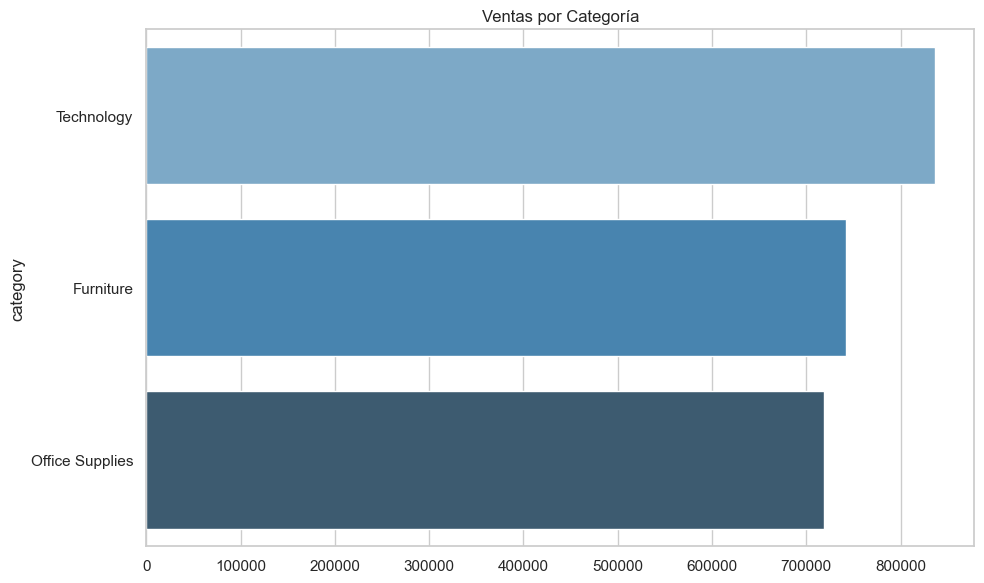

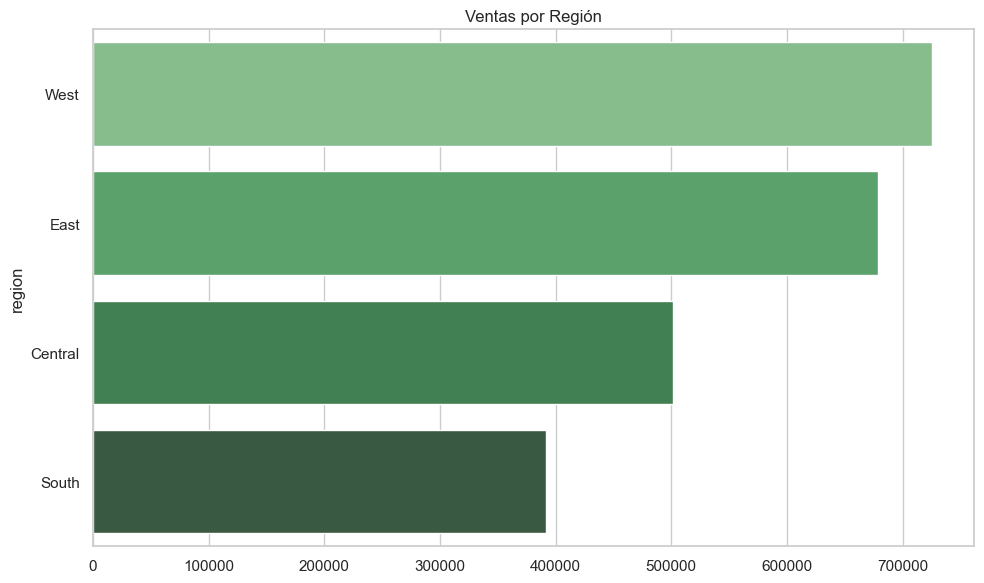

In [8]:
plt.figure()
sns.barplot(x=ventas_categoria.values, y=ventas_categoria.index, palette="Blues_d")
plt.title("Ventas por Categoría")
plt.tight_layout()
plt.savefig("results/grafico_categorias.png")

plt.figure()
sns.barplot(x=ventas_region.values, y=ventas_region.index, palette="Greens_d")
plt.title("Ventas por Región")
plt.tight_layout()
plt.savefig("results/grafico_regiones.png")

print("✅ Gráficos guardados en la carpeta results/")
